# 尝试不同的optimizer对模型进行训练，观察对比loss结果

In [3]:
from sklearn.datasets import fetch_olivetti_faces

In [4]:
olivetti_faces = fetch_olivetti_faces(data_home="./face_data", shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


In [5]:
import torch
import torch.nn as nn

In [6]:
images = torch.tensor(olivetti_faces.data, dtype=torch.float32)
targets = torch.tensor(olivetti_faces.target, dtype=torch.int64)

In [7]:
images.shape

torch.Size([400, 4096])

In [8]:
targets.shape

torch.Size([400])

In [9]:
dataset = [(img, lbl) for img, lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [10]:
dataloaders = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [11]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='mps')

In [12]:
# 多层神经网络模型
def build_model_objects(optim_strategy):
    model = nn.Sequential(
        nn.Linear(4096, 8192),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(8192, 16384),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(16384, 1024),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(1024, 40)
    ).to(device)
    criterion = nn.CrossEntropyLoss()
    if optim_strategy == "SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    elif optim_strategy == "RMSprop":
        optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
    elif optim_strategy == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    else:
        raise ValueError("Unknown optimization strategy")
    return model, criterion, optimizer

In [16]:
loss_hist = {}

for optimizer_name in ["SGD", "RMSprop", "Adam"]:
    model, criterion, optimizer = build_model_objects(optimizer_name)
    loss_hist[optimizer_name] = []
    for epoch in range(20):
        for img, lbl in dataloaders:
            img, lbl = img.to(device), lbl.to(device)
            result = model(img)
            loss = criterion(result, lbl)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist[optimizer_name].append(loss.item())
            print(f"Epoch {epoch}, optimizer_name {optimizer_name}, loss {loss.item()}")

Epoch 0, optimizer_name SGD, loss 3.6867763996124268
Epoch 0, optimizer_name SGD, loss 3.711118221282959
Epoch 0, optimizer_name SGD, loss 3.6863608360290527
Epoch 0, optimizer_name SGD, loss 3.6922926902770996
Epoch 0, optimizer_name SGD, loss 3.710585117340088
Epoch 0, optimizer_name SGD, loss 3.6983158588409424
Epoch 0, optimizer_name SGD, loss 3.678948163986206
Epoch 0, optimizer_name SGD, loss 3.686715602874756
Epoch 0, optimizer_name SGD, loss 3.6872048377990723
Epoch 0, optimizer_name SGD, loss 3.7103705406188965
Epoch 0, optimizer_name SGD, loss 3.6899478435516357
Epoch 0, optimizer_name SGD, loss 3.69633412361145
Epoch 0, optimizer_name SGD, loss 3.6717658042907715
Epoch 0, optimizer_name SGD, loss 3.7003071308135986
Epoch 0, optimizer_name SGD, loss 3.6596145629882812
Epoch 0, optimizer_name SGD, loss 3.7063167095184326
Epoch 0, optimizer_name SGD, loss 3.686190366744995
Epoch 0, optimizer_name SGD, loss 3.746140718460083
Epoch 0, optimizer_name SGD, loss 3.7059097290039062
E

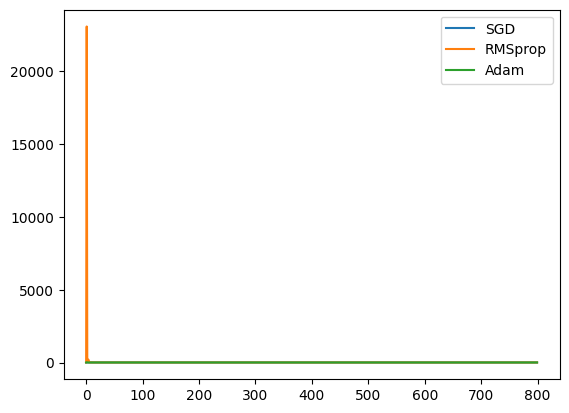

In [18]:
import matplotlib.pyplot as plt
for opt in ["SGD", "RMSprop", "Adam"]:
    plt.plot(range(len(loss_hist[opt])), loss_hist[opt], label=opt)
    plt.legend()
plt.show()